In [1]:
%matplotlib inline
%env OMP_NUM_THREADS=10 
%pylab inline 
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = [12, 12]

env: OMP_NUM_THREADS=10
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append("../utils")

from utils_3d import *
from sfm import *

import copy

# load data 

In [3]:
sfm3view = Sfm3view(np.eye(3),np.zeros(3))

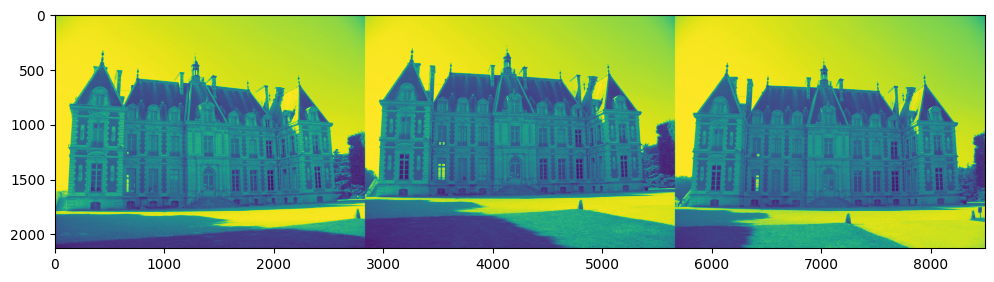

In [4]:
imshow(np.hstack([sfm3view.views[0].im_gray,sfm3view.views[1].im_gray,sfm3view.views[2].im_gray]))

# matching sift

In [5]:
# key point detect view0 and view1
sfm3view.detectKeyPoints(0)
sfm3view.detectKeyPoints(1)

In [6]:
# matching keypoint between view1 and view2
match_pair = sfm3view.matching2views(0,1)
print(len(match_pair))
print(len(sfm3view.match_manage_table))

# compute essential matrix by ransac epipolar
sfm3view.solveEpipolarEqToGetTranslation_2views(0,1)
print(len(sfm3view.match_manage_table))

1540
1540
1540
1540


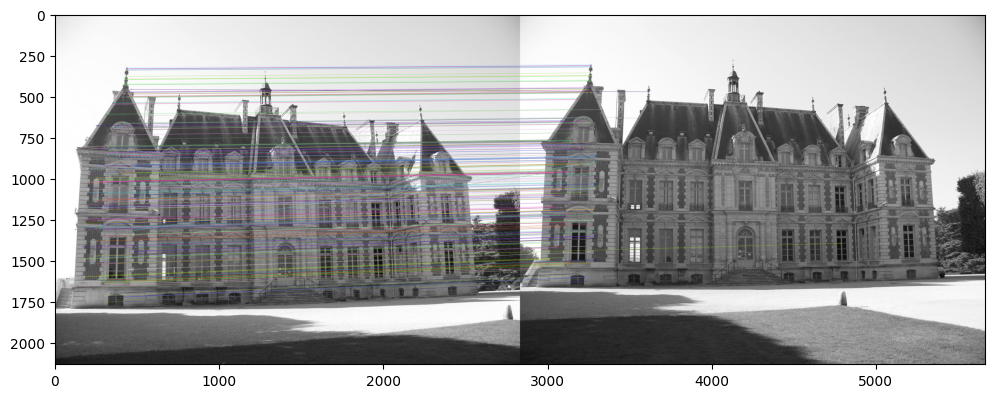

In [7]:
work = sfm3view
img_good_matches_inliers = cv2.drawMatches(work.views[0].im_gray,work.views[0].key_point_uvs,work.views[1].im_gray,work.views[1].key_point_uvs,match_pair[:200],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow(img_good_matches_inliers)

# Extract R ,t by Fundamental matrix and K
* F = K^(-T)EK^(-1)
* E = K^(T)FK
* E= [t]xR

In [8]:
w_v1Pv2,v2Rv1,v1Lmks,inlier_mask = sfm3view.decomposeE2Rt_and_calc_Xs_wrt_v1(0,1)

(1452, 2)
candidate idx:1
inlier mask len: (1452,)
match manage table shape: 1540


# view

(124.07260745316292, 1560.2722981181967) [ 124 1542]
(168.2823883963707, 1341.809888689106) [ 167 1324]
(168.93604354869368, 782.3895136062595) [165 766]
(169.87738876309936, 786.2249385099257) [166 770]
(175.39701297296128, 1506.4048413788837) [ 175 1488]
(179.92690125914646, 1407.9721908519969) [ 179 1390]
(179.92690125914646, 1407.9721908519969) [ 179 1390]
(185.83355076286702, 1234.5070978683386) [ 184 1217]
(187.0020540856303, 1212.9863692178394) [ 185 1195]
(191.83627555267984, 1244.0651622556056) [ 190 1226]
(191.83627555267984, 1244.0651622556056) [ 190 1226]
(194.4280877887541, 1113.1801305039876) [ 192 1096]
(195.3862006925381, 906.7379971861532) [192 890]
(195.75680312059956, 1040.9202455686145) [ 193 1024]
(195.95994270635273, 1211.59122779168) [ 194 1194]
(196.8840981102217, 1024.1835111714915) [ 194 1007]
(199.04428733761668, 1187.2217609823483) [ 197 1170]
(200.03872386888148, 976.7335191240326) [197 960]
(202.258740385335, 930.7283316541173) [199 914]
(202.8650709389360

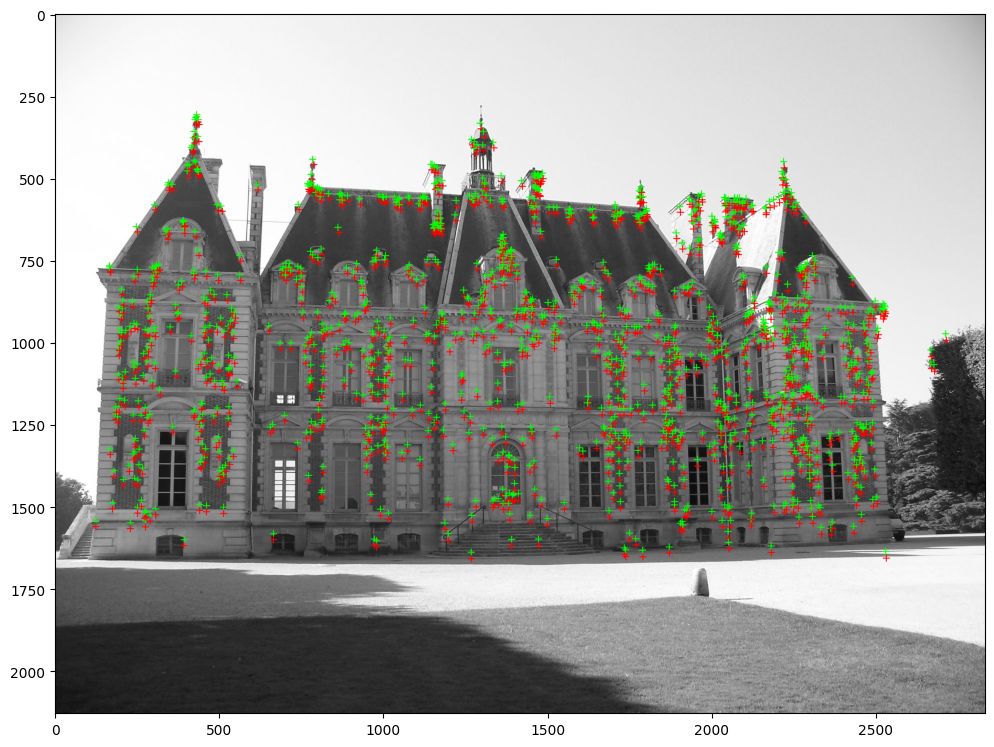

In [9]:
pts1,pts2,_ = sfm3view.get2D_2Dcoresspondance(0,1,True)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

canvas = copy.deepcopy(sfm3view.views[1].im_gray)
canvas = cv2.cvtColor(canvas,cv2.COLOR_GRAY2RGB)

for p,v1Lmk in zip(pts2,v1Lmks):
    cv2.drawMarker(canvas,
                position=p,
                color=(0, 255, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    XX = sfm3view.K.dot(v2Rv1.dot(v1Lmk-w_v1Pv2))
    u = XX[0]/XX[2]
    v = XX[1]/XX[2]
    
    cv2.drawMarker(canvas,
                position=(int(u),int(v)),
                color=(255, 0, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    if 0 < u < canvas.shape[0] and 0 < v < canvas.shape[1]:
        print((u,v),p)

imshow(canvas)

# Third View PNP

In [10]:
# matching v1 and v2
sfm3view.detectKeyPoints(2)
v2_v3_match_pair = sfm3view.matching2views(1,2)

In [11]:
wPv3,wRv3 = sfm3view.solvePNPToGetToGetTranslation_V2andV3(1,2)

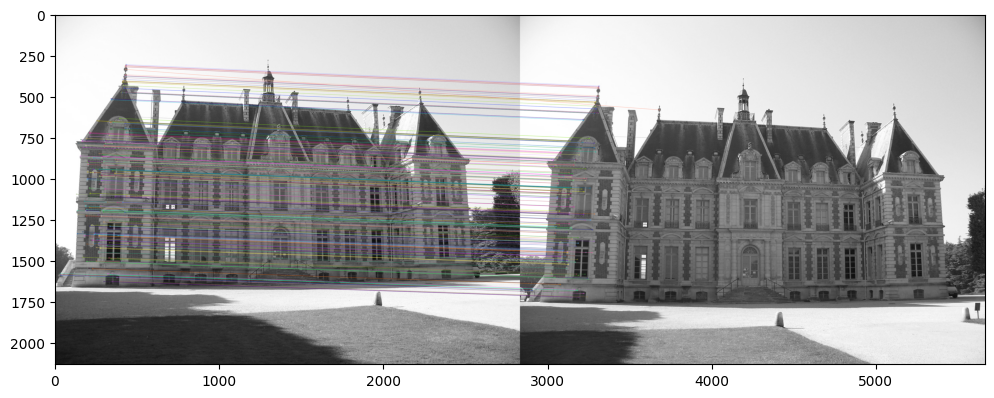

In [12]:
img_good_matches_inliers = cv2.drawMatches(sfm3view.views[1].im_gray,sfm3view.views[1].key_point_uvs,sfm3view.views[2].im_gray,sfm3view.views[2].key_point_uvs,v2_v3_match_pair[:200],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow(img_good_matches_inliers)

(196.00944060948297, 1425.1906586446803) [ 192 1425]
(217.66252881233297, 1300.8120495129551) [ 212 1300]
(220.40978491064206, 1330.8064992952973) [ 216 1331]
(220.40978491064206, 1330.8064992952973) [ 216 1331]
(225.48773826358038, 1299.464683458126) [ 221 1299]
(231.31936327817598, 1118.915537558937) [ 224 1118]
(235.78762859795944, 1073.29369388416) [ 227 1072]
(238.75088037539163, 1029.0958371109468) [ 230 1028]
(238.98298252592048, 1230.6898331887662) [ 232 1230]
(239.0033552250309, 1215.5024798400018) [ 232 1215]
(244.42547591688688, 1011.9311863154711) [ 236 1010]
(246.69334768948937, 987.9848415685157) [237 987]
(242.83810016782957, 1281.8151250450564) [ 237 1281]
(247.13857921986084, 1198.3718585936635) [ 240 1197]
(252.3279145304155, 1077.162031136446) [ 245 1076]
(248.1717515042379, 1474.4059835602457) [ 246 1474]
(247.32845243034842, 1644.014730503672) [ 245 1644]
(262.5154643136788, 1440.2533862754565) [ 259 1441]
(271.40706566627983, 1169.1111571241584) [ 265 1168]
(271.4

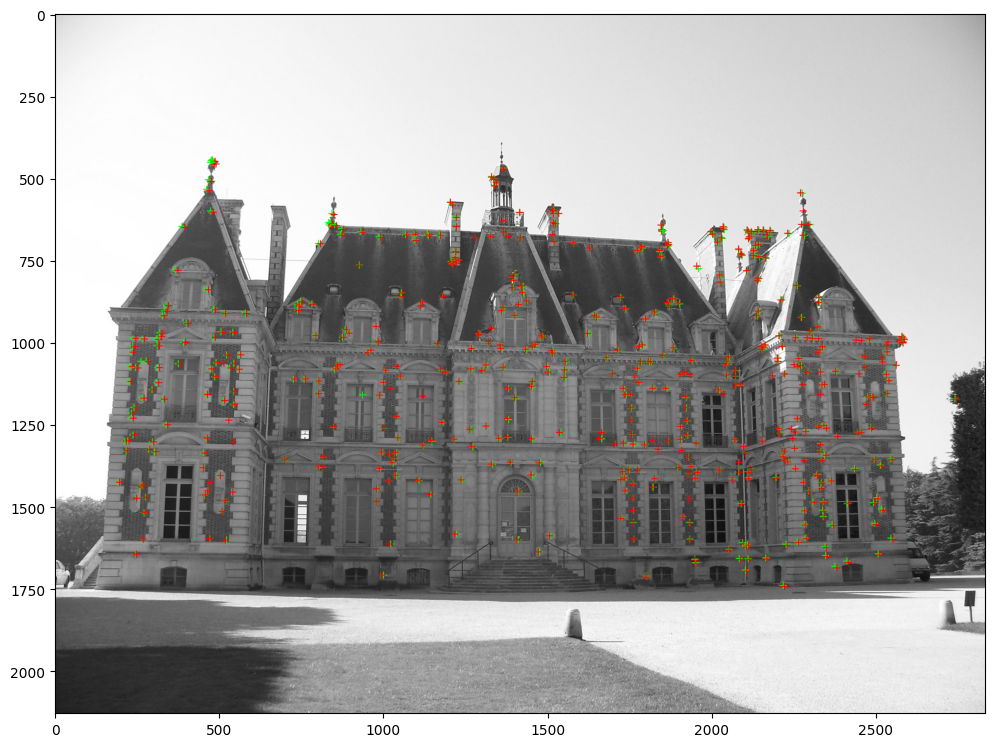

In [13]:
pts2,wLmks,_ = sfm3view.get2D_3Dcoresspondance(1,2,True)
pts2 = np.int32(pts2)
canvas = copy.deepcopy(sfm3view.views[2].im_gray)
canvas = cv2.cvtColor(canvas,cv2.COLOR_GRAY2RGB)
for p,v1Lmk in zip(pts2,wLmks):
    cv2.drawMarker(canvas,
                position=p,
                color=(0, 255, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    XX = sfm3view.K.dot(wRv3.T.dot(v1Lmk-wPv3))
    u = XX[0]/XX[2]
    v = XX[1]/XX[2]
    
    cv2.drawMarker(canvas,
                position=(int(u),int(v)),
                color=(255, 0, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    if 0 < u < canvas.shape[0] and 0 < v < canvas.shape[1]:
        print((u,v),p)
        
imshow(canvas)

In [14]:
out_pcl_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/model_test2.ply"
out_camera_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/camera2.ply"

wPv1 = np.array([0,0,0])
wRv1 = np.eye(3)

pts2,wLmks,_ = sfm3view.get2D_3Dcoresspondance(1,2,True)

wLmks = wRv1.dot(v1Lmks.T).T + wPv1
save_3dpoints_ply(wLmks,out_pcl_file_name,[255,0,0])

wRv2 = wRv1.dot(v2Rv1.T)
wPv2 = wPv1 + wRv2.dot(w_v1Pv2)

Ps = np.array([wPv1,wPv2,wPv3])
Rs= np.array([wRv1,wRv2,wRv3])

generate_multiple_camera_ply(Ps,Rs,out_camera_file_name,[0,255,0],False)

for p,mask,wLmk in zip(sfm3view.match_manage_table,inlier_mask,wLmks):
    p["wLmk"] = wLmk
    p["inlier"] = mask

# BA

In [15]:
sfm3view.make3viewGraphForBA()

num vertices: 632
num edges: 1620


In [16]:
sfm3view.optimizeBA()

Performing full BA:


iteration= 0	 chi2= 483222.651485	 time= 0.00314415	 cumTime= 0.00314415	 edges= 1620	 schur= 1	 lambda= 122.490128	 levenbergIter= 1
iteration= 1	 chi2= 71171.898258	 time= 0.00115799	 cumTime= 0.00430214	 edges= 1620	 schur= 1	 lambda= 40.830043	 levenbergIter= 1
iteration= 2	 chi2= 27859.201415	 time= 0.00107162	 cumTime= 0.00537377	 edges= 1620	 schur= 1	 lambda= 13.610014	 levenbergIter= 1
iteration= 3	 chi2= 13269.929999	 time= 0.000969575	 cumTime= 0.00634334	 edges= 1620	 schur= 1	 lambda= 4.536671	 levenbergIter= 1
iteration= 4	 chi2= 5410.780356	 time= 0.000954311	 cumTime= 0.00729765	 edges= 1620	 schur= 1	 lambda= 1.512224	 levenbergIter= 1
iteration= 5	 chi2= 5090.549248	 time= 0.00099412	 cumTime= 0.00829177	 edges= 1620	 schur= 1	 lambda= 0.504075	 levenbergIter= 1
iteration= 6	 chi2= 4965.325101	 time= 0.000938599	 cumTime= 0.00923037	 edges= 1620	 schur= 1	 lambda= 0.168025	 levenbergIter= 1
iteration= 7	 chi2= 4881.135103	 time= 0.000973384	 cumTime= 0.0102038	 edges=

In [17]:

Rs_ba = []
Ps_ba = []
for i in range(3):
    R = sfm3view.views[i].R
    t = sfm3view.views[i].t
    Rs_ba.append(R)
    Ps_ba.append(t)

Rs_ba = np.array(Rs_ba)
Ps_ba = np.array(Ps_ba)

_,_,_,lmks,_ = sfm3view.get3Viewcoresspondance(0,1,2,True)

ion= 23	 chi2= 4724.457345	 time= 0.00100343	 cumTime= 0.0261367	 edges= 1620	 schur= 1	 lambda= 0.000000	 levenbergIter= 1
iteration= 24	 chi2= 4724.438704	 time= 0.000973927	 cumTime= 0.0271107	 edges= 1620	 schur= 1	 lambda= 0.000000	 levenbergIter= 1
iteration= 25	 chi2= 4724.420325	 time= 0.000924071	 cumTime= 0.0280347	 edges= 1620	 schur= 1	 lambda= 0.000000	 levenbergIter= 1
iteration= 26	 chi2= 4724.402205	 time= 0.00095428	 cumTime= 0.028989	 edges= 1620	 schur= 1	 lambda= 0.000000	 levenbergIter= 1
iteration= 27	 chi2= 4724.384339	 time= 0.000916327	 cumTime= 0.0299053	 edges= 1620	 schur= 1	 lambda= 0.000000	 levenbergIter= 1
iteration= 28	 chi2= 4724.366721	 time= 0.000932423	 cumTime= 0.0308378	 edges= 1620	 schur= 1	 lambda= 0.000000	 levenbergIter= 1
iteration= 29	 chi2= 4724.349346	 time= 0.000915303	 cumTime= 0.0317531	 edges= 1620	 schur= 1	 lambda= 0.000000	 levenbergIter= 1
iteration= 30	 chi2= 4724.332210	 time= 0.000920199	 cumTime= 0.0326733	 edges= 1620	 schur=

In [20]:
out_pcl_ba_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/model_test5_ba.ply"
out_camera_ba_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/camera5_ba.ply"

In [22]:
save_3dpoints_ply(lmks,out_pcl_ba_file_name,[100,100,155])

generate_multiple_camera_ply(Ps_ba,Rs_ba,out_camera_ba_file_name,[0,100,155],False)